In [2]:
import torch
import utils
import dlc_practical_prologue as prologue

from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
from itertools import product

#from utils import train_model
#from utils_mt import accuracy_mt, train_model_mt
from TrainingFramework import TrainingFramework, plot_hist, end_of_hist_result

## Test changes

In [5]:
def count_parameters(model):
    nb_params = 0
    for parameter in model.parameters():
        nb_params = nb_params + parameter.numel()
    return nb_params

In [3]:
tf = TrainingFramework(validationProp=0.2,
                       batchsize=100,
                       mainLoss=nn.CrossEntropyLoss(),
                       auxLoss=nn.CrossEntropyLoss()
)

trn : torch.Size([1000, 2, 14, 14]) 
trnY : torch.Size([1000]) 
trnAuxY : torch.Size([2, 1000])


In [14]:
class WeightShareAndAux(nn.Module):
    def __init__(self, nb_hidden=100):
        
        super(WeightShareAndAux, self).__init__()
        
        self.shared = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2)   
        )
        
        self.classifier1 = nn.Sequential(
            nn.Linear(512, nb_hidden),
            nn.ReLU(True),
            nn.Linear(nb_hidden, 10)
        )
        
        self.classifier2 = nn.Sequential(
            nn.Linear(20, 32),
            nn.ReLU(True),
            nn.Linear(32, 2)
        )
        

    def forward(self, x):        
        x1 = x[:,0:1,:,:]
        x2 = x[:,1:2,:,:]
                
        # Pass x1 and x2 through the weight-shared part
        x1_aux = self.classifier1(self.shared(x1).view(-1, 512))
        x2_aux = self.classifier1(self.shared(x2).view(-1, 512))
        
        # Group both result and pass them through the unified part
        x_main = torch.cat ([x1_aux, x2_aux], dim=1)
        x_main = self.classifier2(x_main)
        
        return x_main, (x1_aux, x2_aux)
    
WA = WeightShareAndAux()
print(count_parameters(WA))

145464


In [18]:
class NothingAtAll(nn.Module):
    def __init__(self, nb_hidden=100):
        
        super(NothingAtAll, self).__init__()
        
        self.not_shared1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2)   
        )
        
        self.not_shared2 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2)   
        )
        
        self.classifier1_1 = nn.Sequential(
            nn.Linear(512, nb_hidden),
            nn.ReLU(True),
            nn.Linear(nb_hidden, 10)
        )
        
        self.classifier1_2 = nn.Sequential(
            nn.Linear(512, nb_hidden),
            nn.ReLU(True),
            nn.Linear(nb_hidden, 10)
        )
        
        self.classifier2 = nn.Sequential(
            nn.Linear(20, 32),
            nn.ReLU(True),
            nn.Linear(32, 2)
        )
        

    def forward(self, x):        
        x1 = x[:,0:1,:,:]
        x2 = x[:,1:2,:,:]
                
        # Pass x1 and x2 through the weight-shared part
        x1_aux = self.classifier1_1(self.not_shared1(x1).view(-1, 512))
        x2_aux = self.classifier1_2(self.not_shared2(x2).view(-1, 512))
        
        # Group both result and pass them through the unified part
        x_main = torch.cat ([x1_aux, x2_aux], dim=1)
        x_main = self.classifier2(x_main)
        
        return x_main
    
N = NothingAtAll()
print(count_parameters(N))

290190


In [19]:
tf2 = TrainingFramework(class NothingAtAll(nn.Module):
    def __init__(self, nb_hidden=100):
        
        super(NothingAtAll, self).__init__()
        
        self.not_shared1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2)   
        )
        
        self.not_shared2 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2)   
        )
        
        self.classifier1_1 = nn.Sequential(
            nn.Linear(512, nb_hidden),
            nn.ReLU(True),
            nn.Linear(nb_hidden, 10)
        )
        
        self.classifier1_2 = nn.Sequential(
            nn.Linear(512, nb_hidden),
            nn.ReLU(True),
            nn.Linear(nb_hidden, 10)
        )
        
        self.classifier2 = nn.Sequential(
            nn.Linear(20, 32),
            nn.ReLU(True),
            nn.Linear(32, 2)
        )
        

    def forward(self, x):        
        x1 = x[:,0:1,:,:]
        x2 = x[:,1:2,:,:]
                
        # Pass x1 and x2 through the weight-shared part
        x1_aux = self.classifier1_1(self.not_shared1(x1).view(-1, 512))
        x2_aux = self.classifier1_2(self.not_shared2(x2).view(-1, 512))
        
        # Group both result and pass them through the unified part
        x_main = torch.cat ([x1_aux, x2_aux], dim=1)
        x_main = self.classifier2(x_main)
        
        return x_main
    
N = NothingAtAll()
print(count_parameters(N))validationProp=0.2,
                       batchsize=100,
                       mainLoss=nn.CrossEntropyLoss(),
                       auxLoss=None
)

trn : torch.Size([1000, 2, 14, 14]) 
trnY : torch.Size([1000]) 
trnAuxY : torch.Size([2, 1000])


In [20]:
hist, times = tf2.validateModel(NothingAtAll, epochs=5, nb_iter=1)

'Epoch 5/5'

/home/toby/Workspace/deep-learning-miniprojects/proj1/TrainingFramework.py:217: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df_hist = pd.concat([df_hist, df_fold])


/home/toby/Installed/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:851: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


,train_loss,train_acc,val_loss,val_acc,aux_train_loss,aux_train_acc,aux_val_loss,aux_val_acc,epoch
last,0.309336,0.862,0.367378,0.82,NaN,NaN,NaN,NaN,4
best,0.309336,0.862,0.367378,0.82,NaN,NaN,NaN,NaN,4


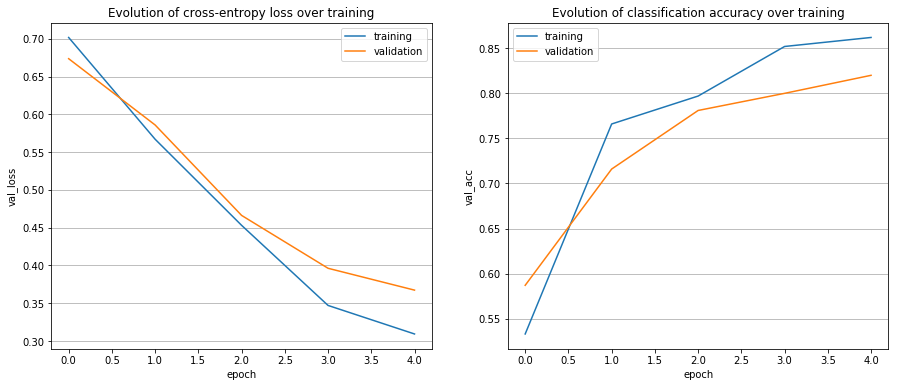

In [23]:
plot_hist(hist, auxloss=False)